#### Imports

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#### Load Data

In [2]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')


#### Data Cleaning

In [3]:
train = train.drop('Id', axis = 1)
test = test.drop('Id', axis = 1)

test['SalePrice'] = 0

In [4]:
print(train.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

#### Data Preprocessing

In [5]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
def preprocess(dataframe, cat_columns, num_columns):
    encoder = OneHotEncoder(sparse_output = False,
                            handle_unknown = 'ignore')
    scaler = StandardScaler()

    #encode categorical columns
    encoded_cols = encoder.fit_transform(dataframe[cat_columns])
    encoded_df = pd.DataFrame(encoded_cols, columns = encoder.get_feature_names_out(cat_columns))
    dataframe = pd.concat([dataframe.reset_index(drop = True), encoded_df.reset_index(drop = True)], axis = 1)

    #scale numerical columns
    scaled_cols = scaler.fit_transform(dataframe[num_columns])
    scaled_df = pd.DataFrame(scaled_cols, columns = num_columns)
    dataframe = pd.concat([dataframe.reset_index(drop = True), scaled_df.reset_index(drop = True)], axis = 1)

    #drop original columns
    dataframe.drop(columns = cat_columns + num_columns, inplace = True)
    return dataframe

cat_cols = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
            'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
            'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
            'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
            'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
            'MoSold', 'YrSold', 'SaleCondition']
num_cols = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
            '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
            'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
            'PoolArea', 'MiscVal']

train = preprocess(train, cat_cols, num_cols)
test = preprocess(test, cat_cols, num_cols)



In [6]:
print(train.columns)
print(test.columns)
print(train.shape)
print(test.shape)

Index(['SalePrice', 'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40',
       'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70',
       'MSSubClass_75', 'MSSubClass_80',
       ...
       'YrSold_2007', 'YrSold_2008', 'YrSold_2009', 'YrSold_2010',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=422)
Index(['SalePrice', 'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40',
       'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70',
       'MSSubClass_75', 'MSSubClass_80',
       ...
       'YrSold_2007', 'YrSold_2008', 'YrSold_2009', 'YrSold_2010',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=413)
(1460, 422)
(1459, 413)


In [7]:
missing_cols = set(test.columns) - set(train.columns)
print(missing_cols)
print(len(missing_cols))

{'GarageCars_2.0', 'GarageYrBlt_1896.0', 'SaleType_nan', 'GarageCars_0.0', 'GarageCars_5.0', 'Exterior1st_nan', 'GarageYrBlt_2207.0', 'GarageYrBlt_1943.0', 'GarageCars_nan', 'Functional_nan', 'KitchenQual_nan', 'GarageYrBlt_1895.0', 'GarageYrBlt_1919.0', 'GarageCars_1.0', 'Exterior2nd_nan', 'GarageCars_4.0', 'MSSubClass_150', 'Utilities_nan', 'GarageYrBlt_1917.0', 'MSZoning_nan', 'GarageCars_3.0'}
21


In [8]:
for col in missing_cols:
    train[col] = 0

missing_cols = set(test.columns) - set(train.columns)
print(len(missing_cols))

0


In [9]:
print(train.columns)

Index(['SalePrice', 'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40',
       'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70',
       'MSSubClass_75', 'MSSubClass_80',
       ...
       'GarageYrBlt_1895.0', 'GarageYrBlt_1919.0', 'GarageCars_1.0',
       'Exterior2nd_nan', 'GarageCars_4.0', 'MSSubClass_150', 'Utilities_nan',
       'GarageYrBlt_1917.0', 'MSZoning_nan', 'GarageCars_3.0'],
      dtype='object', length=443)


#### Modeling

In [10]:
from sklearn.model_selection import train_test_split
#create train test split for model
X = train.drop(columns = 'SalePrice')
y = train['SalePrice']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras import backend as K

def r2_score(y_true, y_pred):
    ss_res = K.sum(K.square(y_true - y_pred))
    ss_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - ss_res / (ss_tot + K.epsilon())

# Define HyperModel
class HousePriceHyperModel(HyperModel):
    def build(self, hp):
        model = keras.Sequential()
        model.add(layers.Input(shape=(X_train.shape[1],)))
        model.add(layers.BatchNormalization())

        for i in range(hp.Int('num_layers', 1, 5)):
            model.add(layers.Dense(units=hp.Int('units_' + str(i), 
                                                min_value=256,
                                                max_value=1024,
                                                step=256),
                                   activation='relu'))
            model.add(layers.BatchNormalization())
            model.add(layers.Dropout(hp.Float('dropout_' + str(i),
                                              min_value=0.2,
                                              max_value=0.5,
                                              step=0.1)))
        model.add(layers.Dense(1, activation='linear'))

        model.compile(
            optimizer=keras.optimizers.Adam(
                learning_rate=hp.Float('learning_rate', 
                                       min_value=1e-4,
                                       max_value=1e-2,
                                       sampling='LOG')
            ),
            loss='mean_squared_error',
            metrics=['mean_absolute_error', RootMeanSquaredError(), r2_score]
        )
        return model
    
tuner = RandomSearch(
    HousePriceHyperModel(),
    objective = 'val_mean_absolute_error',
    max_trials = 10,
    executions_per_trial = 2,
    directory = 'House Prices',
    project_name = 'House Prices')

Reloading Tuner from House Prices\House Prices\tuner0.json


C:\Users\jfsal\AppData\Local\Temp\ipykernel_15444\2536811359.py:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperModel


C:\Users\jfsal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1601386112.0000 - r2_score: 0.7201 
Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 633935040.0000 - r2_score: 0.8733 - val_loss: 1726872960.0000 - val_r2_score: 0.7233
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 731853376.0000 - r2_score: 0.8530 - val_loss: 1780100224.0000 - val_r2_score: 0.7140
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 730141440.0000 - r2_score: 0.8615 - val_loss: 1832342016.0000 - val_r2_score: 0.7027
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 499076576.0000 - r2_score: 0.9110 - val_loss: 1847441408.0000 - val_r2_score: 0.6999
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 662783552.0000 - r2_score: 0.8599 - val_loss: 1882906496.0000 - val_r2_score: 0.6908
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 634855232.0000 - r2_score: 0.8840 - val_loss: 1910605568.0000 - val_r2_score: 0.6857
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 

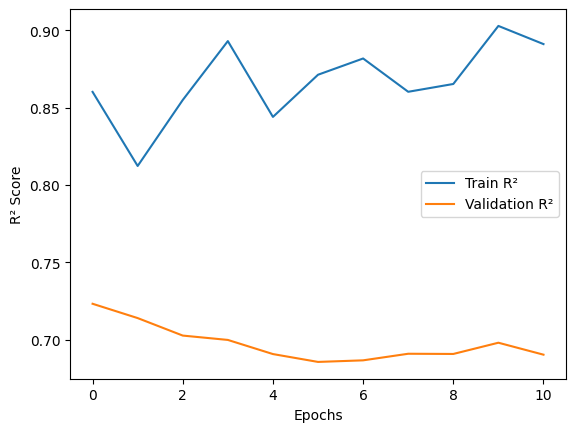

In [13]:


def r2_score(y_true, y_pred):
    y_true = K.cast(y_true, K.floatx())
    y_pred = K.cast(y_pred, K.floatx())
    ss_res = K.sum(K.square(y_true - y_pred))
    ss_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - ss_res / (ss_tot + K.epsilon())

# Assuming the rest of your code is already defined
tuner.search(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=50,
    callbacks=[keras.callbacks.EarlyStopping(patience=10)]
)

best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparams = tuner.get_best_hyperparameters(num_trials=1)[0]

best_model.compile(optimizer='adam', loss='mean_squared_error', metrics=[r2_score])
best_model.evaluate(X_valid, y_valid)

history = best_model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=50,
    callbacks=[keras.callbacks.EarlyStopping(patience=10)]
)

import matplotlib.pyplot as plt

plt.plot(history.history['r2_score'], label='Train R²')
plt.plot(history.history['val_r2_score'], label='Validation R²')
plt.xlabel('Epochs')
plt.ylabel('R² Score')
plt.legend()
plt.show()